# Mini Intro to Numpy
by Liang Jin

Part of AcF701 Python Sessions:
- [github.com/drliangjin/mini-python-book](https://github.com/drliangjin/mini-python-book)

Official NumPy Doc:
- [numpy.org](http://www.numpy.org/)

## NumPy -- Numerical Python
One of the most important foundational package for numerical computing in Python.
- ndarray: multi-dimensional array
- mathematical functions
- linear algebra, random number generation, and so on

#### Import Package

In [3]:
import numpy

In [4]:
# Python Convention
import numpy as np

NumPy based algorithes are generally **10** to **100** faster (or more) than pure Python algorithms

#### NumPy ndarray Object

In [5]:
# Generate random data
# np ==> short for Numpy
# random ==> sub-module in Numpy
# randn ==> a function in sub-module, random, in Numpy
arr1 = np.random.randn(2, 3) # ==> 2 rows, 3 columns

In [6]:
arr1

array([[-1.31931127, -1.7074548 ,  0.754846  ],
       [-0.82358785,  0.20476979, -1.23841523]])

In [7]:
# basic attributes on the array
arr1.ndim, arr1.shape, arr1.dtype

(2, (2, 3), dtype('float64'))

#### Creating ndarrays

In [8]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [9]:
# we can a specify data type
arr3 = np.array(data2, dtype=np.float64)
arr3

array([[1., 2., 3., 4.],
       [5., 6., 7., 8.]])

In [10]:
# or cast an array using astype method
arr4 = arr3.astype('int64')
arr3.dtype, arr4.dtype

(dtype('float64'), dtype('int64'))

#### Arithmetic operations

In [11]:
# element-wise calculations
arr3 * 2

array([[ 2.,  4.,  6.,  8.],
       [10., 12., 14., 16.]])

In [12]:
# array-wise calculations
arr3 - arr3

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

#### Indexing and Slicing

In [14]:
# create an array using arange, similar to python's built-in range
arr = np.arange(10) # again, 10 elements from 0 to 9
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
# retrieve element(s)
arr[5], arr[5:]

(5, array([5, 6, 7, 8, 9]))

In [18]:
# update element(s).
arr[5:] = -99
arr

array([  0,   1,   2,   3,   4, -99, -99, -99, -99, -99])

In [19]:
# WARNING: mutations, need to use .copy() method
arr_slice = arr[5:]
arr_slice[1]=-100
arr

#### Boolean Indexing

In [30]:
# generate random data
data = np.random.randn(2,5)
data

array([[ 1.23962624, -0.41508516, -1.40192547,  0.25303811, -0.00538131],
       [ 2.26644996, -1.3524111 , -1.87090939,  2.10934498, -0.71874484]])

In [31]:
# create a new array which is booleans
cond = data <= 0
cond

array([[False,  True,  True, False,  True],
       [False,  True,  True, False,  True]])

In [32]:
# filter data using conditions
data_cond = data[cond]
data_cond

array([-0.41508516, -1.40192547, -0.00538131, -1.3524111 , -1.87090939,
       -0.71874484])

#### NumPy functions (1) 

In [35]:
# create an array
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [36]:
# universal (element-wise) functions: abs, square, exp, log, and so on
arr_sqrt = np.sqrt(arr) # <= fast element-wise operations
arr_sqrt

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ])

More funcs: `abs`, `square`, `exp`, `log`, and so on.

#### NumPy functions (2)

In [41]:
x = np.random.randn(5)
x

array([ 0.76494403, -0.01550855, -1.18319092, -0.44664875, -0.90728471])

In [42]:
y = np.random.randn(5)
y

array([-0.3595871 ,  0.85945165,  0.37724096, -1.0857925 ,  0.44382726])

In [43]:
# binary (array-wise) function
# obtain the maxium values between two arrays
np.maximum(x, y)

array([ 0.76494403,  0.85945165,  0.37724096, -0.44664875,  0.44382726])

More funcs: `add`, `subtract`, `multiply`, and so on.

#### Mathematical and Statistical Methods

In [53]:
arr = np.random.randn(2, 5)

In [47]:
# obtain the mean of elements in the array
arr.mean(), np.mean(arr)

(0.0007175955255347422, 0.0007175955255347422)

In [51]:
# what if we want row-wise mean instead of whole array?
arr.mean(axis=1), np.mean(arr, axis=1)

(array([-0.16405296,  0.16548815]), array([-0.16405296,  0.16548815]))

In [52]:
# what if column-wise?
arr.mean(axis=0), np.mean(arr, axis=0)

(array([ 0.54678525, -1.0233465 ,  0.65357114, -0.57390761,  0.40048569]),
 array([ 0.54678525, -1.0233465 ,  0.65357114, -0.57390761,  0.40048569]))

#### Why we need vectorizational computation? Why all these array "non-senses"?


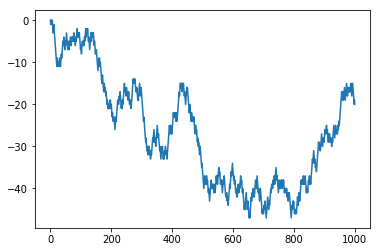

In [58]:
# Python built-in "loop" style
%matplotlib inline
import random, matplotlib.pyplot as plt
position = 0 # <== starting point
walk = [position] # <== a list with the starting point
steps = 1000 # <= 1000 steps
for i in range(steps):
    step = 1 if random.randint(0,1) else -1 # 0 is False, 1 is True
    position += step # <== incremental operations: position = position + step
    walk.append(position) # append new position to the list
# plot data
plt.plot(walk);

#### Numpy Approach using array

In [63]:
nsteps = 1000

In [64]:
draws = np.random.randint(0, 2, size=nsteps) # <= random draw from 0, 1

In [65]:
np_steps = np.where(draws > 0, 1, -1) # if draw = 1 then step 1, otherwise, -1

In [70]:
np_walk = np.cumsum(np_steps) # or np_steps.cumsum(), NumPy method, cumulative sum

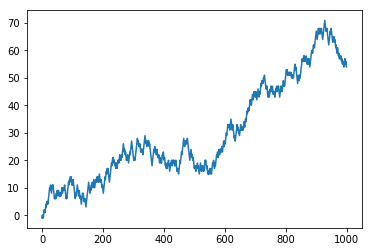

In [72]:
plt.plot(np_walk);

#### Array makes simulating many random walks at once!

In [76]:
nwalks = 10000 # 10,000 simulations
nsteps = 1000

draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # <== again 0 or 1
steps = np.where(draws > 0, 1, -1) # change 0 to -1
walks = steps.cumsum(axis=1) # apply the cumsum() method across columns...

walks # 10000 simulations... all in an array....

array([[ -1,  -2,  -1, ...,   4,   5,   4],
       [ -1,  -2,  -1, ...,  16,  17,  16],
       [  1,   0,   1, ..., -58, -57, -58],
       ...,
       [ -1,   0,   1, ...,  40,  39,  40],
       [ -1,  -2,  -3, ...,   0,   1,   0],
       [ -1,  -2,  -3, ..., -22, -23, -22]])